In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
penguin_df = pd.read_csv('penguins.csv')
print(penguin_df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [4]:
#Find the NA values
print("Total Rows =>",penguin_df.shape[0])
print("NA count across rows\n",penguin_df.isna().sum())



Total Rows => 344
NA count across rows
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [5]:
# Dropping the rows with NA values in those rows
penguin_df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)

In [6]:
# Assuming penguin_df is your DataFrame containing the penguin data

# Importing pandas library
import pandas as pd

# Calculate mode of 'sex' column
mode_sex = penguin_df['sex'].mode()[0]

# Fill NaN values in 'sex' column with the mode
penguin_df['sex'] = penguin_df['sex'].fillna(mode_sex)
print(penguin_df.isna().sum())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


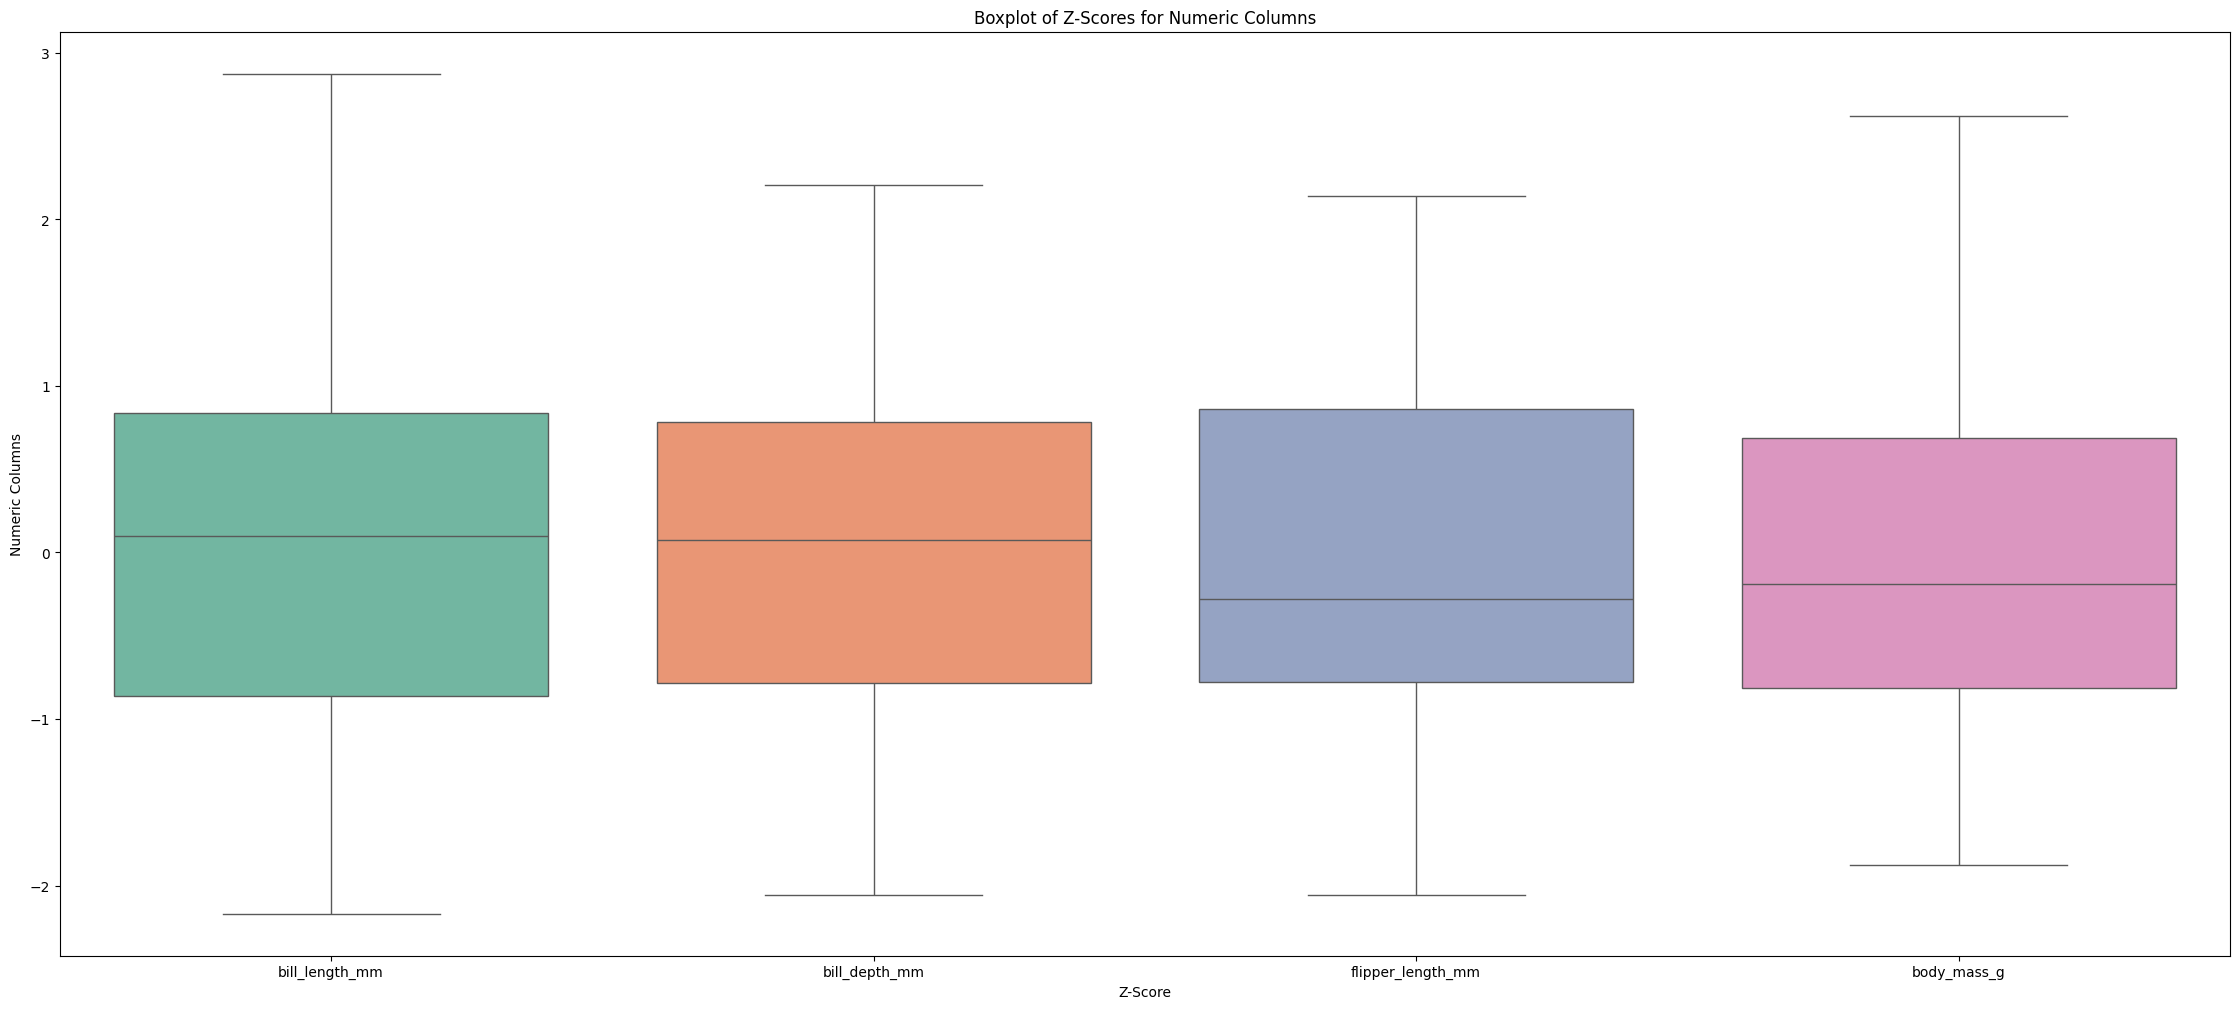

Total outlier rows => 0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import zscore


# Calculate z-scores for each numeric column
z_scores = zscore(penguin_df.select_dtypes(include=np.number))

# Create a DataFrame of z-scores
z_scores_df = pd.DataFrame(z_scores, columns=penguin_df.select_dtypes(include=np.number).columns)

# Set up the boxplot figure
plt.figure(figsize=(28, 12))

# Draw boxplots for each numeric column
sns.boxplot(data=z_scores_df, orient='v', palette='Set2')

# Add title and labels
plt.title('Boxplot of Z-Scores for Numeric Columns')
plt.xlabel('Z-Score')
plt.ylabel('Numeric Columns')

# Display the plot
plt.show()

threshold = 3
abs_z_scores = np.abs(z_scores)
# Find rows with any z-score exceeding the threshold
outlier_rows = penguin_df[(abs_z_scores > threshold).any(axis=1)]
print("Total outlier rows =>", outlier_rows.shape[0])
penguin_df = penguin_df[(abs_z_scores <= threshold).all(axis=1)]





In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

penguin_df['species'] = label_encoder.fit_transform(penguin_df.species)

In [9]:

penguin_df = pd.get_dummies(penguin_df)
penguin_df = penguin_df.replace({True:1, False:0})
print(penguin_df.head(20))

    species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0         0            39.1           18.7              181.0       3750.0   
1         0            39.5           17.4              186.0       3800.0   
2         0            40.3           18.0              195.0       3250.0   
4         0            36.7           19.3              193.0       3450.0   
5         0            39.3           20.6              190.0       3650.0   
6         0            38.9           17.8              181.0       3625.0   
7         0            39.2           19.6              195.0       4675.0   
8         0            34.1           18.1              193.0       3475.0   
9         0            42.0           20.2              190.0       4250.0   
10        0            37.8           17.1              186.0       3300.0   
11        0            37.8           17.3              180.0       3700.0   
12        0            41.1           17.6              182.0   

/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_7189/2175311353.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguin_df = penguin_df.replace({True:1, False:0})


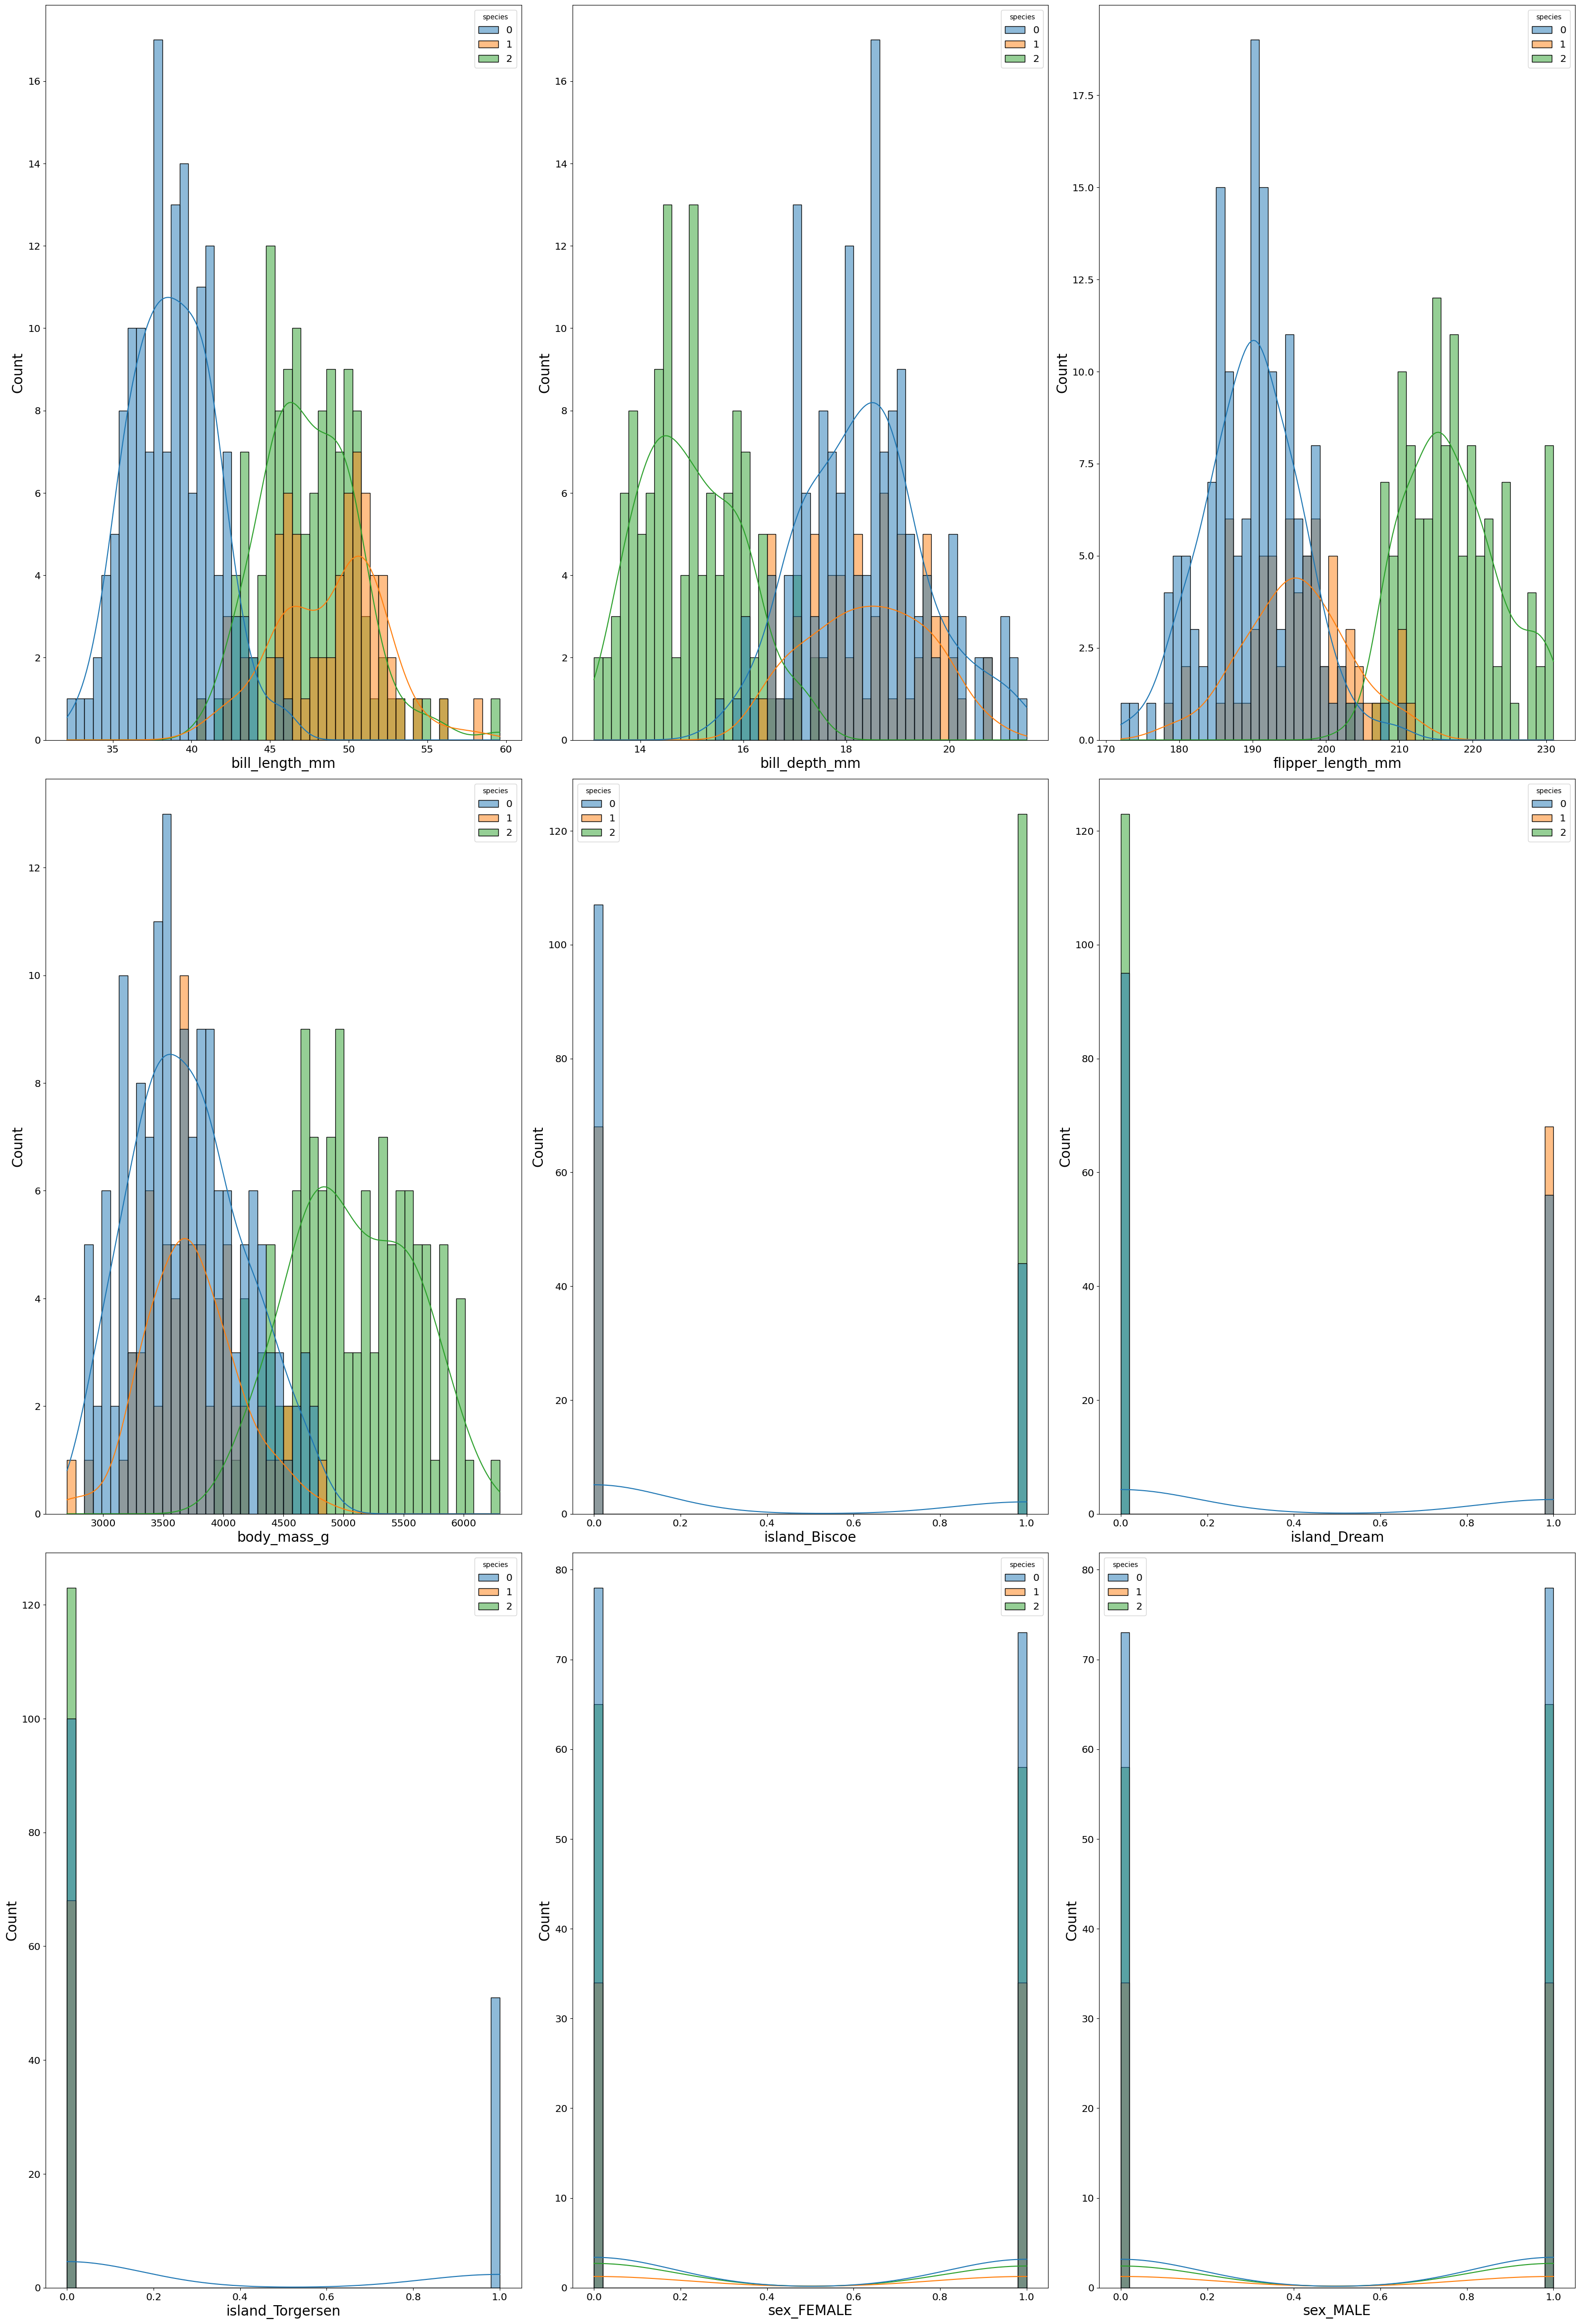

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(penguin_df.shape[1] / num_cols) + 1
palette = sns.color_palette('tab10', n_colors=len(penguin_df['species'].unique()))
for index, col in enumerate(penguin_df.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(penguin_df, x=col, hue='species', kde=True, bins=50, palette=palette)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

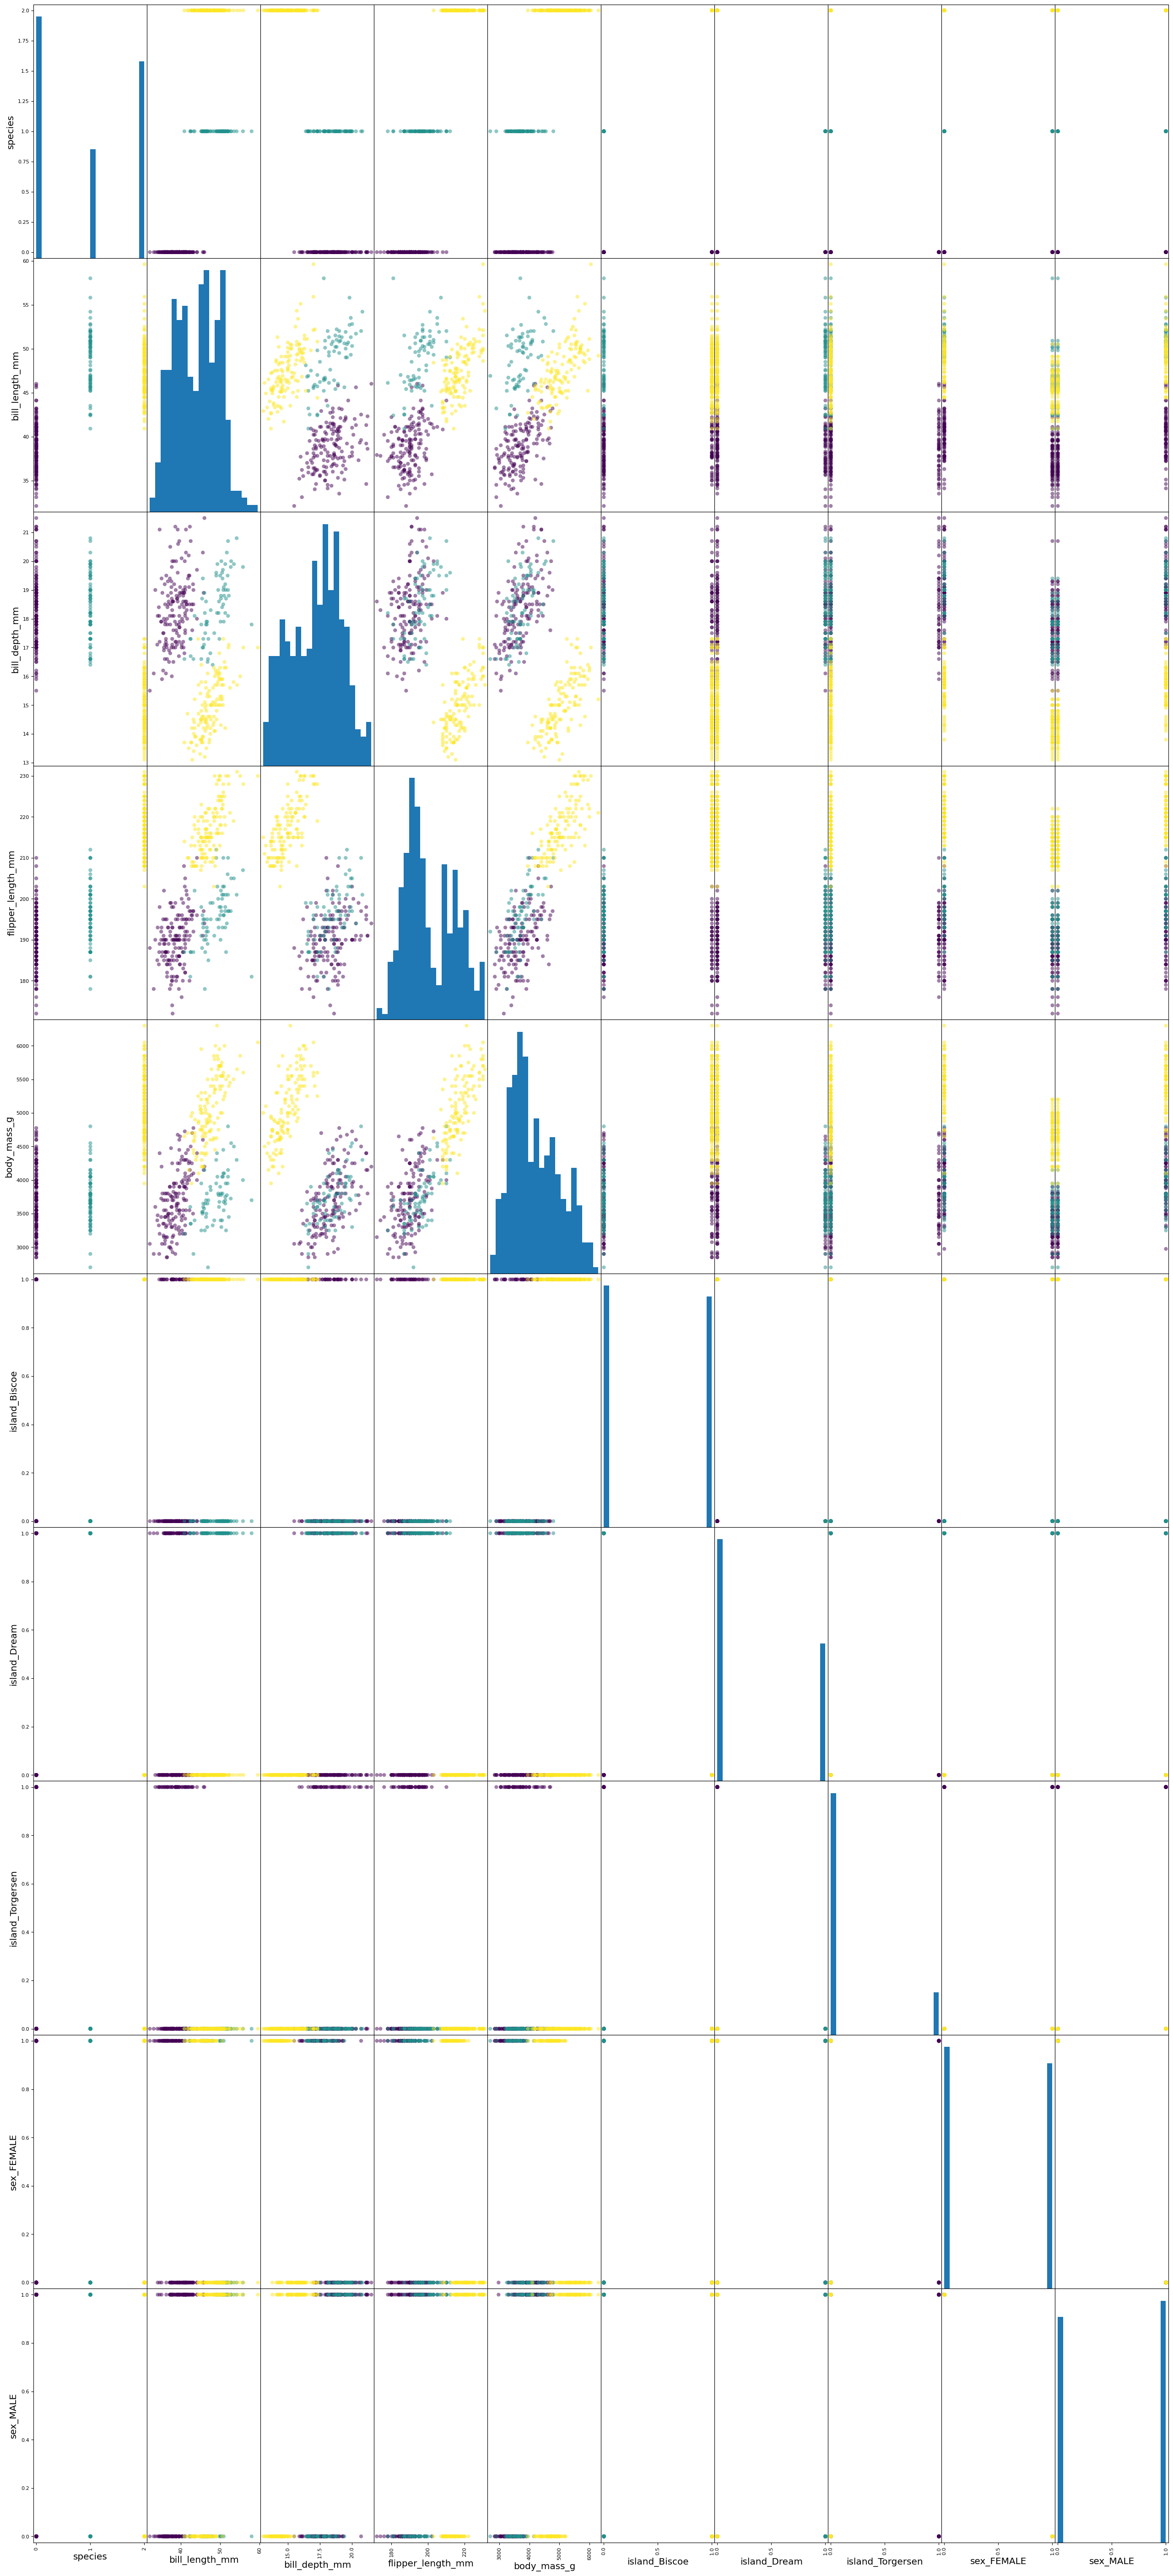

In [11]:
from pandas.plotting import scatter_matrix

# List of attributes for scatter matrix
attributes = penguin_df.columns.tolist()

# Add hue to the scatter matrix plot
scatter_matrix(penguin_df[attributes], figsize=(32, 72), c=penguin_df['species'], marker='o', hist_kwds={'bins': 20}, alpha=0.5)
plt.show()

species              1.000000
bill_length_mm       0.731369
bill_depth_mm       -0.744076
flipper_length_mm    0.854307
body_mass_g          0.750491
island_Biscoe        0.608185
island_Dream        -0.312855
island_Torgersen    -0.431225
sex_FEMALE          -0.009790
sex_MALE             0.009790
Name: species, dtype: float64


<Axes: >

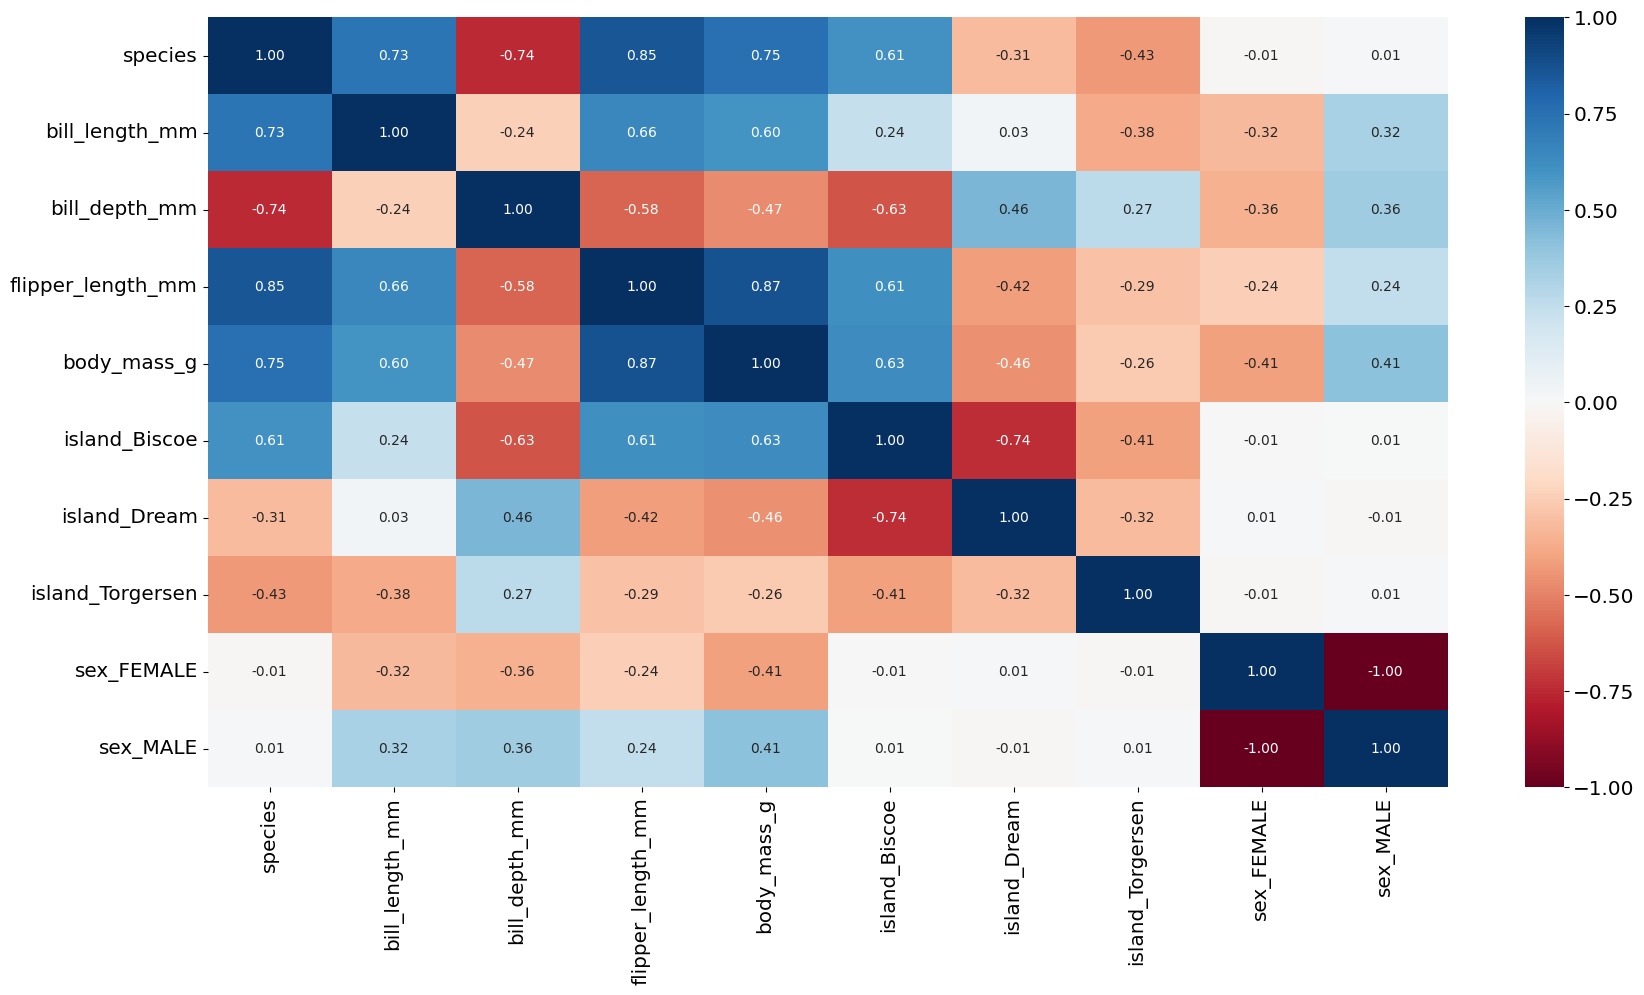

In [12]:
penguin_df_corr_matrix = penguin_df.corr()
print(penguin_df_corr_matrix['species'])
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(penguin_df.corr(numeric_only=True), cmap='RdBu', annot=True, fmt=".2f")

In [13]:
y = penguin_df.species.values
X = penguin_df.drop(['species'], axis=1)


In [14]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Normalizing the independent variables: Makes the convergence faster
X_train=(X_train-np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0))
X_test=(X_test-np.min(X_test, axis=0))/(np.max(X_test, axis=0)-np.min(X_test, axis=0))

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = clf_rf.predict(X_test)

In [18]:
y_pred

array([2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 0, 0])

In [19]:
y_test

array([2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9710144927536232

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00        22

    accuracy                           0.97        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.97      0.97      0.97        69



[[34  1  0]
 [ 1 11  0]
 [ 0  0 22]]


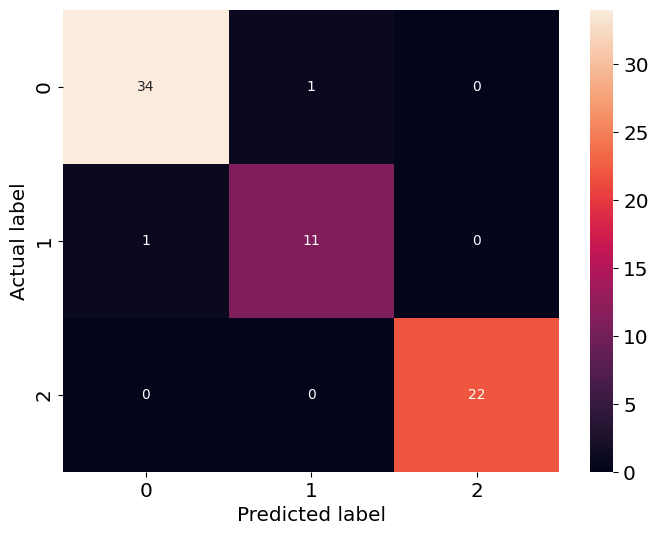

In [30]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.4g')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');